C:\Users\Dustin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1217
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']
image:  [[ 126.33333588  133.33332825  108.66666412 ...,  100.          100.66666412
    67.33333588]
 [ 108.33333588  120.66666412  114.66666412 ...,  100.33333588   96.
    70.33333588]
 [  94.66666412  123.          127.         ...,   99.           91.33333588
    64.33333588]
 ..., 
 [  77.66666412  173.66667175  245.33332825 ...,    8.            6.            8.        ]
 [  81.33333588  179.33332825  247.66667175 ...,   17.            3.66666675
     5.33333349]
 [  83.66666412  179.          247.66667175 ...,   30.33333397    2.
     3.66666675]]


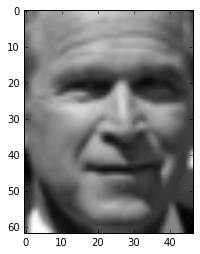

3
George W Bush
data:  [ 126.33333588  133.33332825  108.66666412 ...,   30.33333397    2.
    3.66666675]
data length:  2914


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import numpy

lfw_people = fetch_lfw_people(min_faces_per_person=70)
print(len(lfw_people.images))
print(lfw_people.target_names)

image_num = 4 #try plugging in some other numbers too

print("image: ",lfw_people.images[image_num])

plt.imshow(lfw_people.images[image_num],cmap='gray')
plt.show()

img_target = lfw_people.target[image_num]
print(img_target)
print(lfw_people.target_names[img_target])

print("data: ", lfw_people.data[image_num])
print("data length: ",len(lfw_people.data[image_num]))


In [26]:
(train_data, test_data, train_target, test_target)= train_test_split(lfw_people.data, lfw_people.target,test_size = 0.2)

mlp_classifier = MLPClassifier()
mlp_classifier.fit(train_data,train_target)
predictions = mlp_classifier.predict(test_data)
print("MLPC Accuracy: ",accuracy_score(predictions,test_target))

sv_classifier = svm.SVC(kernel='linear')
sv_classifier.fit(train_data,train_target)
predictions = sv_classifier.predict(test_data)
print("Linear Accuracy: ",accuracy_score(predictions,test_target))

sv_classifier = svm.SVC(kernel='rbf')
sv_classifier.fit(train_data,train_target)
predictions = sv_classifier.predict(test_data)
print("RBF Accuracy: ",accuracy_score(predictions,test_target))

sv_classifier = svm.SVC(kernel='sigmoid')
sv_classifier.fit(train_data,train_target)
predictions = sv_classifier.predict(test_data)
print("Sigmoid Accuracy: ",accuracy_score(predictions,test_target))

sv_classifier = svm.SVC(kernel='poly')
sv_classifier.fit(train_data,train_target)
predictions = sv_classifier.predict(test_data)
print("Poly Accuracy: ",accuracy_score(predictions,test_target))


MLPC Accuracy:  0.147540983607
Linear Accuracy:  0.823770491803
RBF Accuracy:  0.372950819672
Sigmoid Accuracy:  0.372950819672
Poly Accuracy:  0.83606557377


In [27]:
# for i in range(len(predictions)):
#     plt.imshow(test_data[i].reshape(62,47),cmap='gray')
#     plt.show()
#     print("predicted: ",\
#     lfw_people.target_names[predictions[i]],\
#     " actual: ", lfw_people.target_names[test_target[i]])

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True)
pca.fit(train_data)
transformed_train_data = pca.transform(train_data)
transformed_test_data = pca.transform(test_data)

svc = svm.SVC(kernel='linear')
svc.fit(transformed_train_data,train_target)
predictions = svc.predict(transformed_test_data)
print("Linear Accuracy: ",accuracy_score(test_target, predictions))

svc = svm.SVC(kernel='rbf')
svc.fit(transformed_train_data,train_target)
predictions = svc.predict(transformed_test_data)
print("RBF Accuracy: ",accuracy_score(test_target, predictions))

svc = svm.SVC(kernel='sigmoid')
svc.fit(transformed_train_data,train_target)
predictions = svc.predict(transformed_test_data)
print("Sigmoid Accuracy: ",accuracy_score(test_target, predictions))

svc = svm.SVC(kernel='poly')
svc.fit(transformed_train_data,train_target)
predictions = svc.predict(transformed_test_data)
print("Poly Accuracy: ",accuracy_score(test_target, predictions))

Linear Accuracy:  0.75
RBF Accuracy:  0.815573770492
Sigmoid Accuracy:  0.790983606557
Poly Accuracy:  0.377049180328


In [29]:
from sklearn import grid_search

param_1 = {'C':[.00001,.0001,.001,.01,.05,1,10,50,100],'kernel': ['linear']}
param_2 = {'C':[.00001,.0001,.001,.01,.05,1,10,50,100],'gamma': [100,10,1,.01,.001,.0001,.00001,.000001,.0000001],'degree': [1,2,3,4,5],'kernel': ['poly']}
param_3 = {'C':[.00001,.0001,.001,.01,.05,1,10,50,100],'gamma': [100,10,1,.01,.001,.0001,.00001,.000001,.0000001],'kernel': ['rbf']}
param_4 = {'C':[.00001,.0001,.001,.01,.05,1,10,50,100],'gamma': [100,10,1,.01,.001,.0001,.00001,.000001,.0000001],'kernel': ['sigmoid']}

parameters = [param_1,param_2,param_3,param_4]

svc_grid_search = grid_search.GridSearchCV(svm.SVC(), parameters)

svc_grid_search.fit(transformed_train_data,train_target)

print("C: ",svc_grid_search.best_estimator_.C)
print("Gamma: ",svc_grid_search.best_estimator_.gamma)
print("Degree: ",svc_grid_search.best_estimator_.degree)
print("Kernel: ",svc_grid_search.best_estimator_.kernel)

predictions = svc_grid_search.predict(transformed_test_data)
print(accuracy_score(test_target, predictions))


C:  10
Gamma:  0.01
Degree:  3
Kernel:  rbf
0.856557377049
